<a href="https://colab.research.google.com/github/faruk17035/3rd-Work/blob/main/AUPR_Curve_%2B_Table_3_CNN%2BNLP_with_FST_%2B_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## 1. Golve

In [3]:
import pandas as pd
from pandas import read_excel
file_name = '/content/gdrive/MyDrive/Gloveallghor.csv'
# Glove3decimal.csv
# Gloveallghor.csv 
df = pd.read_csv(file_name, index_col=0)
#df = pd.read_csv(file_name)
print(df.head()) # print the first 5 rows

               tpc1      tpc2      tpc3      tpc4      tpc5      tpc6  \
tpc0                                                                    
-0.000004 -0.026288  0.057258  0.045387  0.079776 -0.019956  0.033242   
-0.052125  0.002777  0.055245  0.073139  0.070794 -0.026946 -0.014475   
-0.036938 -0.040373  0.074364  0.029228  0.067112 -0.032641 -0.002931   
-0.007257 -0.031773  0.035037  0.055648  0.086997 -0.015932  0.028711   
 0.035118 -0.039462  0.075805  0.013093  0.086463 -0.017675  0.045797   

               tpc7      tpc8      tpc9     tpc10  ...    tpc503    tpc504  \
tpc0                                               ...                       
-0.000004 -0.010070 -0.022720 -0.029812  0.060112  ...  0.034153 -0.028236   
-0.052125 -0.006685 -0.027041 -0.023399  0.123481  ...  0.035826 -0.019969   
-0.036938 -0.028603 -0.010675 -0.028728  0.091884  ...  0.027479 -0.015310   
-0.007257 -0.005803 -0.021357 -0.030503  0.068238  ...  0.037971 -0.036039   
 0.035118 -0.019397 

In [4]:
features = np.array(df.columns[:-1])
target = 'Target'

X = df[features]
y = df[target]

In [5]:
pip install shap

     |████████████████████████████████| 564 kB 5.4 MB/s 


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.utils import shuffle
from imblearn.pipeline import Pipeline
import lightgbm as lgb

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=100)

In [8]:
def xgb_shap_values(X_train, y_train, X_test):

    model = XGBClassifier()
    model.fit(X_train, y_train)
    explainer = shap.TreeExplainer(model, X_train)
    shap_values_xgb = explainer.shap_values(X_test)
    # shap.summary_plot(shap_values_xgb, X_test)
    # shap.summary_plot(shap_values_xgb, X_test, plot_type ='bar')
    # shap.dependence_plot("Age", shap_values_xgb, X_test, interaction_index = 'rate Po2')
    shap_sum = np.abs(shap_values_xgb).mean(axis=0)
    importance_df = pd.DataFrame([features, shap_sum.tolist()]).T
    importance_df.columns = ['Column Name', 'Shap Importance']
    importance_df= importance_df.sort_values('Shap Importance', ascending = False)
    return importance_df

In [9]:
selected_df = xgb_shap_values(X_train, y_train,  X_test)

In [10]:
selected_df = selected_df[0:300]
selected_df

,Column Name,Shap Importance
51,tpc52,0.146468
414,tpc415,0.142852
283,tpc284,0.095863
391,tpc392,0.090305
308,tpc309,0.090232
...,...,...
97,tpc98,0.0
508,tpc509,0.0
396,tpc397,0.0
428,tpc429,0.0


In [11]:
selected_df.shape

(300, 2)

In [12]:
cols = selected_df['Column Name']
cols

51      tpc52
414    tpc415
283    tpc284
391    tpc392
308    tpc309
        ...  
97      tpc98
508    tpc509
396    tpc397
428    tpc429
429    tpc430
Name: Column Name, Length: 300, dtype: object

In [13]:
## converting df to numpy array/list
trainingdf = np.array(cols)
trainingdf

array(['tpc52', 'tpc415', 'tpc284', 'tpc392', 'tpc309', 'tpc206',
       'tpc433', 'tpc71', 'tpc444', 'tpc342', 'tpc290', 'tpc382',
       'tpc168', 'tpc67', 'tpc355', 'tpc21', 'tpc196', 'tpc476', 'tpc470',
       'tpc266', 'tpc208', 'tpc221', 'tpc472', 'tpc343', 'tpc350',
       'tpc123', 'tpc232', 'tpc255', 'tpc361', 'tpc326', 'tpc242',
       'tpc494', 'tpc354', 'tpc230', 'tpc75', 'tpc48', 'tpc439', 'tpc234',
       'tpc57', 'tpc374', 'tpc329', 'tpc174', 'tpc406', 'tpc145',
       'tpc296', 'tpc431', 'tpc85', 'tpc373', 'tpc267', 'tpc334',
       'tpc332', 'tpc12', 'tpc315', 'tpc93', 'tpc493', 'tpc330', 'tpc442',
       'tpc323', 'tpc463', 'tpc479', 'tpc107', 'tpc412', 'tpc66', 'tpc17',
       'tpc283', 'tpc68', 'tpc33', 'tpc198', 'tpc503', 'tpc14', 'tpc491',
       'tpc77', 'tpc35', 'tpc233', 'tpc148', 'tpc29', 'tpc419', 'tpc398',
       'tpc428', 'tpc511', 'tpc108', 'tpc306', 'tpc115', 'tpc30',
       'tpc187', 'tpc37', 'tpc411', 'tpc366', 'tpc42', 'tpc399', 'tpc134',
       'tpc14

In [14]:
df1 = X[trainingdf]
df1

,tpc52,tpc415,tpc284,tpc392,tpc309,tpc206,tpc433,tpc71,tpc444,tpc342,...,tpc250,tpc298,tpc238,tpc112,tpc432,tpc98,tpc509,tpc397,tpc429,tpc430
tpc0,,,,,,,,,,,,,,,,,,,,,
-0.000004,0.000303,0.074675,0.022926,-0.051484,-0.008475,-0.040233,0.045480,0.101563,0.021856,0.093771,...,0.004587,0.064781,-0.138565,0.057133,-0.066534,0.008166,-0.050542,0.184560,0.030504,-0.054343
-0.052125,-0.045227,0.069659,-0.011425,-0.083224,-0.014077,0.010146,0.046490,0.110789,0.040764,0.073999,...,0.010780,0.031270,-0.114567,0.078929,-0.024791,0.022345,-0.056355,0.166755,0.010251,-0.116490
-0.036938,-0.060085,0.045235,-0.073880,-0.110592,-0.018651,-0.020193,0.088961,0.158629,0.006527,0.112842,...,0.015034,0.020653,-0.118967,0.049593,-0.070598,0.014044,-0.056376,0.197663,0.024113,-0.108956
-0.007257,-0.012383,0.064951,-0.004089,-0.036874,-0.018442,-0.056375,0.011689,0.129302,0.042427,0.096838,...,0.014366,0.073536,-0.128730,0.050435,-0.074863,0.000866,-0.068661,0.214005,0.038285,-0.078814
0.035118,-0.061718,0.078552,-0.052266,-0.062800,-0.007323,-0.045689,0.090055,0.153193,-0.028659,0.130352,...,-0.008703,0.072602,-0.163745,0.012609,-0.096134,0.014237,-0.050987,0.225550,0.045126,-0.048490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-0.024084,-0.044671,0.071531,-0.023707,-0.072365,-0.009770,-0.025527,0.064018,0.113907,0.021483,0.104187,...,0.000790,0.051466,-0.124177,0.051152,-0.064689,0.009841,-0.048145,0.179164,0.019650,-0.080215
-0.040395,-0.045447,0.067351,-0.015519,-0.082072,-0.002864,-0.011700,0.015159,0.106801,0.034303,0.085405,...,0.001254,0.033298,-0.098833,0.067631,-0.041674,0.019558,-0.049733,0.191444,0.002660,-0.088247
-0.021230,-0.052384,0.065811,-0.028533,-0.087002,-0.012569,-0.002161,0.067859,0.122120,0.020095,0.092242,...,0.015585,0.037972,-0.124053,0.051597,-0.044834,0.010275,-0.061262,0.177865,0.020387,-0.105878


In [15]:
X = df1
y = y

Text(0, 0.5, 'Frequency')

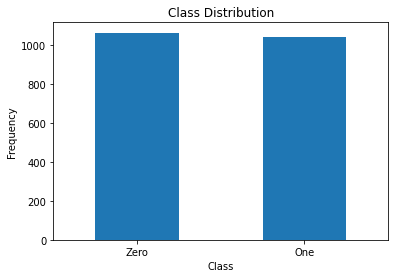

In [16]:
count_classes = pd.value_counts(y, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")

LABELS = ["Zero", "One"]

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [17]:
One = df[y==1]

Zero = df[y==0]

print(Zero.shape,One.shape)

(1041, 512) (1063, 512)


In [18]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X_res,y_res=sm.fit_resample(X,y)

In [19]:
print(X_res.shape)
print(y_res.shape)

(2126, 300)
(2126,)


In [20]:
#Split data into independent (X) and dependent(Y) columns

y = y_res
X = X_res

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 50)

In [22]:
print(X_train.shape)
print(X_test.shape)

(1700, 300)
(426, 300)


In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D

from tensorflow.keras.optimizers import Adam

import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train = X_train.reshape(1700, 300,1)
X_test = X_test.reshape(426, 300, 1)

In [26]:
epochs =50
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape = (300,1))) ##1st conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))  #2nd Conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.3))

model.add(Flatten())    #Flattening
model.add(Dense(64, activation='relu'))  ##fully connected layer
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))   #output layer

In [27]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, batch_size=16,validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
107/107 [==============================] - 13s 12ms/step - loss: 0.7559 - accuracy: 0.5735 - val_loss: 0.6595 - val_accuracy: 0.6033
Epoch 2/50
107/107 [==============================] - 1s 10ms/step - loss: 0.6416 - accuracy: 0.6571 - val_loss: 0.6424 - val_accuracy: 0.5986
Epoch 3/50
107/107 [==============================] - 1s 10ms/step - loss: 0.5839 - accuracy: 0.7006 - val_loss: 0.5984 - val_accuracy: 0.6878
Epoch 4/50
107/107 [==============================] - 1s 9ms/step - loss: 0.5496 - accuracy: 0.7176 - val_loss: 0.5868 - val_accuracy: 0.6667
Epoch 5/50
107/107 [==============================] - 1s 9ms/step - loss: 0.5173 - accuracy: 0.7406 - val_loss: 0.5828 - val_accuracy: 0.7089
Epoch 6/50
107/107 [==============================] - 1s 9ms/step - loss: 0.4856 - accuracy: 0.7729 - val_loss: 0.5819 - val_accuracy: 0.6854
Epoch 7/50
107/107 [==============================] - 1s 9ms/step - loss: 0.4637 - accuracy: 0.7741 - val_loss: 0.5713 - val_accuracy: 0.7136
Ep

In [28]:
#y_pred = model.predict(X_train).ravel()
from sklearn.metrics import roc_curve
y_pred_cnn1 = model.predict(X_test).ravel()
fpr_1, tpr_1, thresholds = roc_curve(y_test, y_pred_cnn1)
from sklearn.metrics import auc
auc_score1 = auc(fpr_1, tpr_1)
auc_score1

0.7796865648482699

In [29]:
from sklearn.metrics import average_precision_score, precision_recall_curve

# Data to plot precision - recall curve
#y_score = clf.predict_proba(X_test)[:, 1]
y_pred_cnn1 = model.predict(X_test).ravel()
precision_1, recall_1, thresholds = precision_recall_curve(y_test, y_pred_cnn1)
# Use AUC function to calculate the area under the curve of precision recall curve
aupr_score1 = auc(recall_1, precision_1)
print(aupr_score1)

0.7869972514027987


Text(0.5, 0, 'Recall')

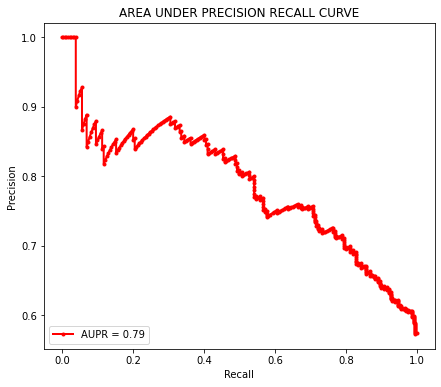

In [30]:
plt.figure(figsize=(7,6))
plt.title('AREA UNDER PRECISION RECALL CURVE')
plt.plot(recall_1, precision_1,color='red',label='AUPR = %0.2f' % aupr_score1,marker='.',linewidth=2,markersize=6)
plt.legend(loc = 'lower left')
plt.ylabel('Precision')
plt.xlabel('Recall')

## 2.FastText

In [31]:
import pandas as pd
from pandas import read_excel
file_name = '/content/gdrive/MyDrive/fastAllghor.csv'
# Glove3decimal.csv
# Gloveallghor.csv 
df = pd.read_csv(file_name, index_col=0)
#df = pd.read_csv(file_name)
print(df.head()) # print the first 5 rows

               tpc1      tpc2      tpc3      tpc4      tpc5      tpc6  \
tpc0                                                                    
-0.045342 -0.119586  0.006219 -0.088131  0.107532  0.033074 -0.006158   
-0.035070 -0.122000  0.005920 -0.095999  0.114729  0.036265 -0.007036   
-0.046473 -0.130959  0.012476 -0.091737  0.110245  0.033604 -0.001858   
-0.048181 -0.113189 -0.000034 -0.076156  0.108456  0.039504 -0.002577   
-0.053381 -0.134055  0.009311 -0.087240  0.109450  0.019906 -0.003768   

               tpc7      tpc8      tpc9     tpc10  ...    tpc503    tpc504  \
tpc0                                               ...                       
-0.045342 -0.049008 -0.041383 -0.035325 -0.045906  ...  0.071249 -0.027845   
-0.035070 -0.053136 -0.048028 -0.027183 -0.044998  ...  0.066538 -0.027696   
-0.046473 -0.046605 -0.042545 -0.005615 -0.042727  ...  0.069494 -0.021039   
-0.048181 -0.043908 -0.053065 -0.024547 -0.044380  ...  0.073099 -0.031108   
-0.053381 -0.045313 

In [32]:
df.shape

(2104, 512)

In [33]:
features = np.array(df.columns[:-1])
target = 'Target'

X = df[features]
y = df[target]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=50)

In [35]:
def xgb_shap_values(X_train, y_train, X_test):

    model = XGBClassifier()
    model.fit(X_train, y_train)
    explainer = shap.TreeExplainer(model, X_train)
    shap_values_xgb = explainer.shap_values(X_test)
    # shap.summary_plot(shap_values_xgb, X_test)
    # shap.summary_plot(shap_values_xgb, X_test, plot_type ='bar')
    # shap.dependence_plot("Age", shap_values_xgb, X_test, interaction_index = 'rate Po2')
    shap_sum = np.abs(shap_values_xgb).mean(axis=0)
    importance_df = pd.DataFrame([features, shap_sum.tolist()]).T
    importance_df.columns = ['Column Name', 'Shap Importance']
    importance_df= importance_df.sort_values('Shap Importance', ascending = False)
    return importance_df

In [36]:
selected_df = xgb_shap_values(X_train, y_train,  X_test)

In [37]:
selected_df = selected_df[0:300]
selected_df

,Column Name,Shap Importance
197,tpc198,0.116124
492,tpc493,0.09923
84,tpc85,0.094053
44,tpc45,0.09286
400,tpc401,0.091136
...,...,...
321,tpc322,0.001106
449,tpc450,0.000962
125,tpc126,0.000946
409,tpc410,0.000942


In [38]:
selected_df.shape

(300, 2)

In [39]:
cols = selected_df['Column Name']
cols

197    tpc198
492    tpc493
84      tpc85
44      tpc45
400    tpc401
        ...  
321    tpc322
449    tpc450
125    tpc126
409    tpc410
234    tpc235
Name: Column Name, Length: 300, dtype: object

In [40]:
## converting df to numpy array/list
trainingdf = np.array(cols)
trainingdf

array(['tpc198', 'tpc493', 'tpc85', 'tpc45', 'tpc401', 'tpc317', 'tpc36',
       'tpc168', 'tpc160', 'tpc491', 'tpc122', 'tpc124', 'tpc387',
       'tpc468', 'tpc265', 'tpc117', 'tpc87', 'tpc474', 'tpc93', 'tpc120',
       'tpc297', 'tpc508', 'tpc268', 'tpc365', 'tpc254', 'tpc484',
       'tpc299', 'tpc284', 'tpc43', 'tpc487', 'tpc264', 'tpc161', 'tpc55',
       'tpc363', 'tpc445', 'tpc8', 'tpc485', 'tpc348', 'tpc386', 'tpc115',
       'tpc286', 'tpc58', 'tpc62', 'tpc371', 'tpc128', 'tpc330', 'tpc141',
       'tpc156', 'tpc32', 'tpc159', 'tpc152', 'tpc4', 'tpc26', 'tpc118',
       'tpc333', 'tpc290', 'tpc274', 'tpc54', 'tpc415', 'tpc251',
       'tpc324', 'tpc337', 'tpc494', 'tpc391', 'tpc78', 'tpc309',
       'tpc326', 'tpc436', 'tpc225', 'tpc205', 'tpc296', 'tpc237',
       'tpc370', 'tpc104', 'tpc483', 'tpc383', 'tpc171', 'tpc80',
       'tpc191', 'tpc414', 'tpc266', 'tpc399', 'tpc495', 'tpc277',
       'tpc382', 'tpc405', 'tpc276', 'tpc57', 'tpc52', 'tpc256', 'tpc56',
       'tpc83

In [41]:
df1 = X[trainingdf]
df1

,tpc198,tpc493,tpc85,tpc45,tpc401,tpc317,tpc36,tpc168,tpc160,tpc491,...,tpc390,tpc413,tpc177,tpc269,tpc176,tpc322,tpc450,tpc126,tpc410,tpc235
tpc0,,,,,,,,,,,,,,,,,,,,,
-0.045342,0.019254,0.003337,0.035640,-0.007473,-0.068853,0.054743,-0.039636,0.034289,-0.006537,0.063238,...,0.018908,0.077732,0.002408,0.008488,-0.039057,-0.000457,-0.051578,0.004806,0.081871,-0.131077
-0.035070,0.025756,0.003777,0.041059,-0.017922,-0.072954,0.065115,-0.035605,0.045051,-0.010033,0.077359,...,-0.000649,0.071938,0.007041,0.002390,-0.043645,0.003818,-0.057032,0.009423,0.090731,-0.124345
-0.046473,0.013189,0.008518,0.043632,-0.038777,-0.063159,0.044884,-0.021634,0.040793,-0.005968,0.073622,...,0.000087,0.060791,-0.015146,0.010468,-0.051480,-0.000496,-0.045310,0.003620,0.084066,-0.145249
-0.048181,0.020902,-0.002815,0.038796,-0.007649,-0.065524,0.059886,-0.039610,0.028973,-0.009479,0.062704,...,0.009984,0.075737,-0.001286,0.012081,-0.032912,0.000293,-0.060938,0.011099,0.092287,-0.123043
-0.053381,0.014097,-0.003913,0.029319,-0.009316,-0.062570,0.062862,-0.025061,0.047203,-0.008625,0.085842,...,0.016097,0.051959,-0.006542,0.010010,-0.066378,-0.010216,-0.054111,-0.002559,0.085265,-0.152999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-0.043920,0.022901,0.003494,0.035202,-0.018574,-0.063815,0.050557,-0.027773,0.039347,-0.008811,0.076823,...,0.005607,0.069487,-0.003174,0.006329,-0.045447,-0.000693,-0.049187,0.006099,0.087276,-0.136520
-0.041732,0.028656,0.004042,0.040697,-0.018891,-0.073743,0.061508,-0.032079,0.045077,-0.009843,0.073295,...,0.004180,0.073103,0.006521,0.007843,-0.032309,-0.005606,-0.057777,0.002677,0.090918,-0.127269
-0.037013,0.017598,0.005357,0.040747,-0.018776,-0.069738,0.053880,-0.030543,0.044058,-0.015158,0.078168,...,0.007715,0.068078,-0.002076,0.011442,-0.047368,-0.003594,-0.050925,0.004861,0.086231,-0.129696


In [42]:
X = df1
y = y

Text(0, 0.5, 'Frequency')

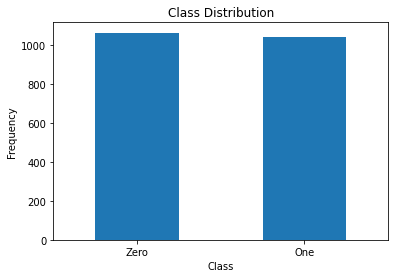

In [43]:
count_classes = pd.value_counts(y, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")

LABELS = ["Zero", "One"]

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [44]:
One = df[y==1]

Zero = df[y==0]

print(Zero.shape,One.shape)

(1041, 512) (1063, 512)


In [45]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X_res,y_res=sm.fit_resample(X,y)

In [46]:
print(X_res.shape)
print(y_res.shape)

(2126, 300)
(2126,)


In [47]:
#Split data into independent (X) and dependent(Y) columns

y = y_res
X = X_res

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 50)

In [49]:
print(X_train.shape)
print(X_test.shape)

(1700, 300)
(426, 300)


In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
X_train = X_train.reshape(1700, 300,1)
X_test = X_test.reshape(426, 300, 1)

In [52]:
epochs =50
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape = (300,1))) ##1st conv layer
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))  #2nd Conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.3))

model.add(Flatten())    #Flattening
model.add(Dense(64, activation='relu'))  ##fully connected layer
#model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))   #output layer

In [53]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, batch_size=32,validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
54/54 [==============================] - 5s 30ms/step - loss: 0.7190 - accuracy: 0.5900 - val_loss: 0.6674 - val_accuracy: 0.6596
Epoch 2/50
54/54 [==============================] - 1s 18ms/step - loss: 0.6406 - accuracy: 0.6612 - val_loss: 0.6472 - val_accuracy: 0.6784
Epoch 3/50
54/54 [==============================] - 1s 17ms/step - loss: 0.6082 - accuracy: 0.6894 - val_loss: 0.6285 - val_accuracy: 0.6901
Epoch 4/50
54/54 [==============================] - 1s 20ms/step - loss: 0.5913 - accuracy: 0.6900 - val_loss: 0.6037 - val_accuracy: 0.7207
Epoch 5/50
54/54 [==============================] - 1s 20ms/step - loss: 0.5570 - accuracy: 0.7206 - val_loss: 0.5956 - val_accuracy: 0.7042
Epoch 6/50
54/54 [==============================] - 1s 20ms/step - loss: 0.5326 - accuracy: 0.7276 - val_loss: 0.5754 - val_accuracy: 0.7183
Epoch 7/50
54/54 [==============================] - 1s 17ms/step - loss: 0.5122 - accuracy: 0.7435 - val_loss: 0.5630 - val_accuracy: 0.7160
Epoch 8/50
54

In [54]:
#y_pred = model.predict(X_train).ravel()
from sklearn.metrics import roc_curve
y_pred_cnn2 = model.predict(X_test).ravel()
fpr_2, tpr_2, thresholds = roc_curve(y_test, y_pred_cnn2)
from sklearn.metrics import auc
auc_score2 = auc(fpr_2, tpr_2)
auc_score2

0.7997029681023209

In [55]:
from sklearn.metrics import average_precision_score, precision_recall_curve

y_pred_cnn2 = model.predict(X_test).ravel()
precision_2, recall_2, thresholds = precision_recall_curve(y_test, y_pred_cnn2)

aupr_score2 = auc(recall_2, precision_2)
print(aupr_score2)

0.7984561860364565


## 3.Word2vec

In [56]:
import pandas as pd
from pandas import read_excel
file_name = '/content/gdrive/MyDrive/word2vecAllghor.csv'
# Glove3decimal.csv
# Gloveallghor.csv 
df = pd.read_csv(file_name, index_col=0)
#df = pd.read_csv(file_name)
print(df.head()) # print the first 5 rows

               tpc1      tpc2      tpc3      tpc4      tpc5      tpc6  \
tpc0                                                                    
-0.037980 -0.022374 -0.000357 -0.052267 -0.080404 -0.026881  0.054797   
-0.046191 -0.036129 -0.002969 -0.074574 -0.081948 -0.029251  0.039459   
-0.039378 -0.029917 -0.002562 -0.051458 -0.080362 -0.040203  0.048534   
-0.037194 -0.028180  0.002139 -0.050322 -0.086340 -0.028409  0.051199   
-0.038799 -0.011877  0.008337 -0.024062 -0.086949 -0.031327  0.053610   

               tpc7      tpc8      tpc9     tpc10  ...    tpc503    tpc504  \
tpc0                                               ...                       
-0.037980 -0.015409 -0.011325 -0.086878 -0.049168  ... -0.016386  0.069154   
-0.046191 -0.008533 -0.009899 -0.084967 -0.047318  ... -0.011916  0.075506   
-0.039378  0.002905 -0.015046 -0.078904 -0.044748  ... -0.015752  0.067525   
-0.037194 -0.011362 -0.014576 -0.086905 -0.051721  ... -0.008505  0.067997   
-0.038799 -0.003705 

In [57]:
features = np.array(df.columns[:-1])
target = 'Target'

X = df[features]
y = df[target]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=100)

In [59]:
def xgb_shap_values(X_train, y_train, X_test):

    model = XGBClassifier()
    model.fit(X_train, y_train)
    explainer = shap.TreeExplainer(model, X_train)
    shap_values_xgb = explainer.shap_values(X_test)
    # shap.summary_plot(shap_values_xgb, X_test)
    # shap.summary_plot(shap_values_xgb, X_test, plot_type ='bar')
    # shap.dependence_plot("Age", shap_values_xgb, X_test, interaction_index = 'rate Po2')
    shap_sum = np.abs(shap_values_xgb).mean(axis=0)
    importance_df = pd.DataFrame([features, shap_sum.tolist()]).T
    importance_df.columns = ['Column Name', 'Shap Importance']
    importance_df= importance_df.sort_values('Shap Importance', ascending = False)
    return importance_df

In [60]:
selected_df = xgb_shap_values(X_train, y_train,  X_test)

In [61]:
selected_df = selected_df[0:300]
selected_df

,Column Name,Shap Importance
234,tpc235,0.126615
60,tpc61,0.107407
322,tpc323,0.103303
52,tpc53,0.085352
30,tpc31,0.072096
...,...,...
75,tpc76,0.000022
411,tpc412,0.0
373,tpc374,0.0
453,tpc454,0.0


In [62]:
cols = selected_df['Column Name']
cols

234    tpc235
60      tpc61
322    tpc323
52      tpc53
30      tpc31
        ...  
75      tpc76
411    tpc412
373    tpc374
453    tpc454
458    tpc459
Name: Column Name, Length: 300, dtype: object

In [63]:
## converting df to numpy array/list
trainingdf = np.array(cols)
trainingdf

array(['tpc235', 'tpc61', 'tpc323', 'tpc53', 'tpc31', 'tpc240', 'tpc203',
       'tpc389', 'tpc371', 'tpc293', 'tpc239', 'tpc272', 'tpc267',
       'tpc455', 'tpc479', 'tpc312', 'tpc332', 'tpc403', 'tpc185',
       'tpc247', 'tpc314', 'tpc301', 'tpc89', 'tpc300', 'tpc427',
       'tpc339', 'tpc442', 'tpc34', 'tpc220', 'tpc346', 'tpc404', 'tpc86',
       'tpc218', 'tpc368', 'tpc352', 'tpc106', 'tpc426', 'tpc341',
       'tpc419', 'tpc91', 'tpc99', 'tpc194', 'tpc29', 'tpc464', 'tpc271',
       'tpc265', 'tpc337', 'tpc199', 'tpc324', 'tpc441', 'tpc292',
       'tpc241', 'tpc251', 'tpc338', 'tpc212', 'tpc309', 'tpc150',
       'tpc56', 'tpc82', 'tpc180', 'tpc298', 'tpc244', 'tpc22', 'tpc460',
       'tpc305', 'tpc435', 'tpc157', 'tpc254', 'tpc330', 'tpc146',
       'tpc162', 'tpc92', 'tpc398', 'tpc233', 'tpc252', 'tpc107',
       'tpc498', 'tpc41', 'tpc430', 'tpc156', 'tpc73', 'tpc462', 'tpc362',
       'tpc4', 'tpc186', 'tpc382', 'tpc226', 'tpc191', 'tpc392', 'tpc12',
       'tpc46', 'tpc

In [64]:
df1 = X[trainingdf]
df1

,tpc235,tpc61,tpc323,tpc53,tpc31,tpc240,tpc203,tpc389,tpc371,tpc293,...,tpc391,tpc263,tpc6,tpc437,tpc115,tpc76,tpc412,tpc374,tpc454,tpc459
tpc0,,,,,,,,,,,,,,,,,,,,,
-0.037980,0.010229,-0.076293,-0.010157,-0.014063,0.018845,0.025981,-0.019028,0.022855,0.018263,-0.042536,...,0.004152,0.011371,0.054797,-0.009110,0.030380,0.048856,-0.049474,-0.024920,-0.028861,0.040130
-0.046191,0.003465,-0.077782,-0.002217,-0.019568,0.013372,0.031366,-0.009494,0.022529,0.024720,-0.045497,...,-0.000296,0.007013,0.039459,-0.015426,0.038641,0.053767,-0.052571,-0.025612,-0.023358,0.037036
-0.039378,0.016035,-0.078777,-0.001930,-0.013736,0.012382,0.027654,-0.018427,0.021625,0.018813,-0.041178,...,0.002768,0.002410,0.048534,-0.008837,0.024834,0.038928,-0.053501,-0.023216,-0.027784,0.049514
-0.037194,0.011590,-0.073037,-0.010125,-0.014139,0.021187,0.025382,-0.021501,0.026131,0.019471,-0.042357,...,0.005931,0.010582,0.051199,-0.008980,0.028575,0.051149,-0.050962,-0.024979,-0.028587,0.037690
-0.038799,0.016680,-0.074774,-0.009669,-0.010863,0.021918,0.027000,-0.027026,0.029476,0.019992,-0.050443,...,0.006267,0.012938,0.053610,-0.005011,0.020714,0.043752,-0.054315,-0.022873,-0.034253,0.046323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-0.035127,0.011628,-0.074539,-0.006155,-0.016529,0.013776,0.028797,-0.016743,0.023555,0.019926,-0.041124,...,0.003824,0.009079,0.044721,-0.007578,0.025482,0.046643,-0.048871,-0.021232,-0.024121,0.044888
-0.040461,0.008688,-0.075958,-0.001283,-0.016122,0.013885,0.028359,-0.010707,0.020493,0.025008,-0.043458,...,0.000345,0.006171,0.041946,-0.014679,0.030118,0.054564,-0.052795,-0.020678,-0.022488,0.039031
-0.040884,0.007752,-0.077944,-0.005706,-0.018159,0.013817,0.030587,-0.011606,0.024130,0.022553,-0.044897,...,0.004973,0.008018,0.044535,-0.009816,0.033380,0.049011,-0.050984,-0.025727,-0.025420,0.039912


In [65]:
X = df1
y = y

Text(0, 0.5, 'Frequency')

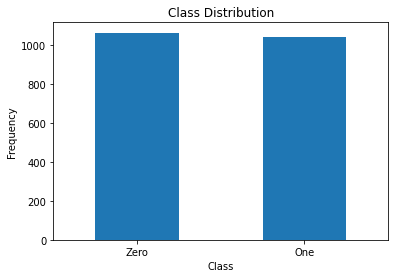

In [66]:
count_classes = pd.value_counts(y, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")

LABELS = ["Zero", "One"]

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [67]:
One = df[y==1]

Zero = df[y==0]

print(Zero.shape,One.shape)

(1041, 512) (1063, 512)


In [68]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X_res,y_res=sm.fit_resample(X,y)

In [69]:
print(X_res.shape)
print(y_res.shape)

(2126, 300)
(2126,)


In [70]:
#Split data into independent (X) and dependent(Y) columns

y = y_res
X = X_res

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 50)

In [72]:
print(X_train.shape)
print(X_test.shape)

(1700, 300)
(426, 300)


In [73]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
X_train = X_train.reshape(1700, 300,1)
X_test = X_test.reshape(426, 300, 1)

In [75]:
epochs =40
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape = (300,1))) ##1st conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))  #2nd Conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.3))

model.add(Flatten())    #Flattening
model.add(Dense(64, activation='relu'))  ##fully connected layer
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))   #output layer

In [76]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, batch_size=32,validation_data=(X_test, y_test), verbose=1)

Epoch 1/40
54/54 [==============================] - 4s 26ms/step - loss: 0.8167 - accuracy: 0.5641 - val_loss: 0.6729 - val_accuracy: 0.6197
Epoch 2/40
54/54 [==============================] - 1s 18ms/step - loss: 0.6962 - accuracy: 0.6341 - val_loss: 0.6570 - val_accuracy: 0.6455
Epoch 3/40
54/54 [==============================] - 1s 16ms/step - loss: 0.6346 - accuracy: 0.6635 - val_loss: 0.6364 - val_accuracy: 0.6667
Epoch 4/40
54/54 [==============================] - 1s 16ms/step - loss: 0.5786 - accuracy: 0.7082 - val_loss: 0.6187 - val_accuracy: 0.6878
Epoch 5/40
54/54 [==============================] - 1s 16ms/step - loss: 0.5311 - accuracy: 0.7382 - val_loss: 0.6043 - val_accuracy: 0.6784
Epoch 6/40
54/54 [==============================] - 1s 16ms/step - loss: 0.5012 - accuracy: 0.7459 - val_loss: 0.5975 - val_accuracy: 0.6667
Epoch 7/40
54/54 [==============================] - 1s 15ms/step - loss: 0.4828 - accuracy: 0.7665 - val_loss: 0.5920 - val_accuracy: 0.6878
Epoch 8/40
54

In [77]:
#y_pred = model.predict(X_train).ravel()
from sklearn.metrics import roc_curve
y_pred_cnn3 = model.predict(X_test).ravel()
fpr_3, tpr_3, thresholds = roc_curve(y_test, y_pred_cnn3)
from sklearn.metrics import auc
auc_score3 = auc(fpr_3, tpr_3)
auc_score3

0.7837873783610045

In [78]:
from sklearn.metrics import average_precision_score, precision_recall_curve
y_pred_cnn3 = model.predict(X_test).ravel()
precision_3, recall_3, thresholds = precision_recall_curve(y_test, y_pred_cnn3)
aupr_score3 = auc(recall_3, precision_3)
print(aupr_score3)

0.7768992636765473


## 4.Glove+FastText

In [79]:
import pandas as pd
from pandas import read_excel
file_name = '/content/gdrive/MyDrive/fasttext+Glove_allghor.csv'
# Glove3decimal.csv
# Gloveallghor.csv 
#df = pd.read_csv(file_name, index_col=0)
df = pd.read_csv(file_name)
print(df.head()) # print the first 5 rows

       tpc0      tpc1      tpc2      tpc3      tpc4      tpc5      tpc6  \
0 -0.045342 -0.119586  0.006219 -0.088131  0.107532  0.033074 -0.006158   
1 -0.035070 -0.122000  0.005920 -0.095999  0.114729  0.036265 -0.007036   
2 -0.046473 -0.130959  0.012476 -0.091737  0.110245  0.033604 -0.001858   
3 -0.048181 -0.113189 -0.000034 -0.076156  0.108456  0.039504 -0.002577   
4 -0.053381 -0.134055  0.009311 -0.087240  0.109450  0.019906 -0.003768   

       tpc7      tpc8      tpc9  ...   PSSM504   PSSM505   PSSM506   PSSM507  \
0 -0.049008 -0.041383 -0.035325  ...  0.034153 -0.028236  0.067696 -0.096331   
1 -0.053136 -0.048028 -0.027183  ...  0.035826 -0.019969  0.041198 -0.089281   
2 -0.046605 -0.042545 -0.005615  ...  0.027479 -0.015310  0.053065 -0.039859   
3 -0.043908 -0.053065 -0.024547  ...  0.037971 -0.036039  0.087234 -0.085197   
4 -0.045313 -0.037604 -0.012921  ...  0.012862 -0.017681  0.083901 -0.106877   

    PSSM508   PSSM509   PSSM510   PSSM511   PSSM512  Target  
0  0.0

In [80]:
features = np.array(df.columns[:-1])
target = 'Target'

X = df[features]
y = df[target]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=100)

In [82]:
def xgb_shap_values(X_train, y_train, X_test):

    model = XGBClassifier()
    model.fit(X_train, y_train)
    explainer = shap.TreeExplainer(model, X_train)
    shap_values_xgb = explainer.shap_values(X_test)
    # shap.summary_plot(shap_values_xgb, X_test)
    # shap.summary_plot(shap_values_xgb, X_test, plot_type ='bar')
    # shap.dependence_plot("Age", shap_values_xgb, X_test, interaction_index = 'rate Po2')
    shap_sum = np.abs(shap_values_xgb).mean(axis=0)
    importance_df = pd.DataFrame([features, shap_sum.tolist()]).T
    importance_df.columns = ['Column Name', 'Shap Importance']
    importance_df= importance_df.sort_values('Shap Importance', ascending = False)
    return importance_df

In [83]:
selected_df = xgb_shap_values(X_train, y_train,  X_test)

In [84]:
selected_df = selected_df[0:300]
selected_df

,Column Name,Shap Importance
927,PSSM416,0.130554
564,PSSM52,0.10725
317,tpc317,0.103628
160,tpc160,0.086484
198,tpc198,0.084436
...,...,...
596,PSSM84,0.003163
982,PSSM471,0.003141
615,PSSM103,0.003098
443,tpc443,0.002986


In [85]:
cols = selected_df['Column Name']
cols

927    PSSM416
564     PSSM52
317     tpc317
160     tpc160
198     tpc198
        ...   
596     PSSM84
982    PSSM471
615    PSSM103
443     tpc443
992    PSSM481
Name: Column Name, Length: 300, dtype: object

In [86]:
## converting df to numpy array/list
trainingdf = np.array(cols)
trainingdf

array(['PSSM416', 'PSSM52', 'tpc317', 'tpc160', 'tpc198', 'tpc85',
       'PSSM284', 'tpc484', 'tpc275', 'tpc401', 'PSSM309', 'tpc474',
       'PSSM206', 'tpc297', 'tpc78', 'PSSM445', 'tpc386', 'tpc45',
       'tpc168', 'tpc508', 'tpc171', 'PSSM221', 'tpc122', 'PSSM57',
       'PSSM374', 'PSSM392', 'tpc336', 'PSSM75', 'tpc491', 'tpc114',
       'tpc348', 'tpc87', 'tpc375', 'tpc200', 'PSSM14', 'PSSM267',
       'tpc117', 'PSSM196', 'tpc483', 'PSSM355', 'tpc274', 'tpc330',
       'tpc254', 'PSSM251', 'tpc309', 'PSSM477', 'PSSM21', 'tpc487',
       'tpc471', 'PSSM337', 'tpc164', 'tpc36', 'PSSM342', 'PSSM434',
       'tpc264', 'PSSM93', 'PSSM512', 'PSSM71', 'PSSM450', 'tpc118',
       'tpc313', 'tpc26', 'PSSM242', 'tpc9', 'tpc290', 'tpc387',
       'PSSM198', 'tpc485', 'tpc115', 'PSSM107', 'tpc415', 'tpc33',
       'PSSM506', 'PSSM334', 'PSSM159', 'PSSM438', 'tpc511', 'PSSM122',
       'PSSM278', 'tpc363', 'PSSM73', 'tpc493', 'tpc412', 'tpc161',
       'PSSM306', 'PSSM298', 'PSSM266', 'PSS

In [87]:
df1 = X[trainingdf]
df1

,PSSM416,PSSM52,tpc317,tpc160,tpc198,tpc85,PSSM284,tpc484,tpc275,tpc401,...,tpc170,tpc59,tpc181,tpc65,tpc128,PSSM84,PSSM471,PSSM103,tpc443,PSSM481
0,0.074675,0.000303,0.054743,-0.006537,0.019254,0.035640,0.022926,-0.015163,-0.047186,-0.068853,...,0.050211,-0.120951,-0.054883,-0.155607,0.170089,0.047103,-0.240459,-0.040893,-0.003465,0.155880
1,0.069659,-0.045227,0.065115,-0.010033,0.025756,0.041059,-0.011425,-0.014945,-0.048729,-0.072954,...,0.055604,-0.136739,-0.048517,-0.179391,0.175684,0.005580,-0.211733,0.012064,-0.023681,0.158020
2,0.045235,-0.060085,0.044884,-0.005968,0.013189,0.043632,-0.073880,-0.006281,-0.039897,-0.063159,...,0.042178,-0.106983,-0.038587,-0.195234,0.172634,0.008156,-0.213299,-0.024047,-0.018807,0.113445
3,0.064951,-0.012383,0.059886,-0.009479,0.020902,0.038796,-0.004089,-0.013383,-0.055300,-0.065524,...,0.053789,-0.118954,-0.047608,-0.162462,0.158248,0.043949,-0.239939,-0.041432,-0.005638,0.156230
4,0.078552,-0.061718,0.062862,-0.008625,0.014097,0.029319,-0.052266,-0.010182,-0.042071,-0.062570,...,0.033615,-0.107755,-0.044856,-0.173833,0.160427,0.072549,-0.259170,-0.093650,0.004248,0.122687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,0.071531,-0.044671,0.050557,-0.008811,0.022901,0.035202,-0.023707,-0.010078,-0.039779,-0.063815,...,0.048891,-0.117886,-0.043647,-0.177037,0.176576,0.023753,-0.244895,-0.036128,-0.011041,0.144846
2100,0.067351,-0.045447,0.061508,-0.009843,0.028656,0.040697,-0.015519,-0.019474,-0.046468,-0.073743,...,0.055291,-0.141631,-0.050155,-0.164752,0.166357,0.028856,-0.216104,-0.009722,-0.017874,0.151821
2101,0.065811,-0.052384,0.053880,-0.015158,0.017598,0.040747,-0.028533,-0.010631,-0.041382,-0.069738,...,0.051729,-0.120211,-0.042780,-0.178786,0.169803,0.014051,-0.220992,-0.020357,-0.019721,0.136304
2102,0.080016,-0.035019,0.057374,-0.003344,0.023072,0.043177,-0.017203,-0.013531,-0.039304,-0.062365,...,0.040498,-0.120897,-0.037987,-0.171936,0.166480,0.035271,-0.233733,-0.026215,-0.016055,0.143721


In [88]:
X = df1
y = y

Text(0, 0.5, 'Frequency')

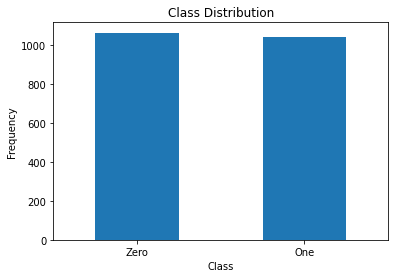

In [89]:
count_classes = pd.value_counts(y, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")

LABELS = ["Zero", "One"]

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [90]:
One = df[y==1]

Zero = df[y==0]

print(Zero.shape,One.shape)

(1041, 1025) (1063, 1025)


In [91]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X_res,y_res=sm.fit_resample(X,y)

In [92]:
print(X_res.shape)
print(y_res.shape)

(2126, 300)
(2126,)


In [93]:
#Split data into independent (X) and dependent(Y) columns

y = y_res
X = X_res

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [95]:
print(X_train.shape)
print(X_test.shape)

(1700, 300)
(426, 300)


In [96]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [97]:
X_train = X_train.reshape(1700, 300,1)
X_test = X_test.reshape(426, 300, 1)

In [98]:
epochs =50
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape = (300,1))) ##1st conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))  #2nd Conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.3))

model.add(Flatten())    #Flattening
model.add(Dense(64, activation='relu'))  ##fully connected layer
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))   #output layer

In [99]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, batch_size=32,validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
54/54 [==============================] - 4s 34ms/step - loss: 0.7533 - accuracy: 0.6035 - val_loss: 0.6645 - val_accuracy: 0.6362
Epoch 2/50
54/54 [==============================] - 1s 16ms/step - loss: 0.6524 - accuracy: 0.6624 - val_loss: 0.6486 - val_accuracy: 0.6502
Epoch 3/50
54/54 [==============================] - 1s 11ms/step - loss: 0.6190 - accuracy: 0.6729 - val_loss: 0.6306 - val_accuracy: 0.6831
Epoch 4/50
54/54 [==============================] - 1s 11ms/step - loss: 0.5644 - accuracy: 0.7276 - val_loss: 0.6140 - val_accuracy: 0.7160
Epoch 5/50
54/54 [==============================] - 1s 11ms/step - loss: 0.5371 - accuracy: 0.7341 - val_loss: 0.5911 - val_accuracy: 0.7183
Epoch 6/50
54/54 [==============================] - 1s 11ms/step - loss: 0.4860 - accuracy: 0.7624 - val_loss: 0.5821 - val_accuracy: 0.7113
Epoch 7/50
54/54 [==============================] - 1s 11ms/step - loss: 0.4912 - accuracy: 0.7600 - val_loss: 0.5731 - val_accuracy: 0.7136
Epoch 8/50
54

In [100]:
#y_pred = model.predict(X_train).ravel()
from sklearn.metrics import roc_curve
y_pred_cnn4 = model.predict(X_test).ravel()
fpr_4, tpr_4, thresholds = roc_curve(y_test, y_pred_cnn4)
from sklearn.metrics import auc
auc_score4 = auc(fpr_4, tpr_4)
auc_score4

0.7831569664902999

In [101]:
from sklearn.metrics import average_precision_score, precision_recall_curve
y_pred_cnn4 = model.predict(X_test).ravel()
precision_4, recall_4, thresholds = precision_recall_curve(y_test, y_pred_cnn4)
aupr_score4 = auc(recall_4, precision_4)
print(aupr_score4)

0.7695855491449191


## 5. Glove+Word2vec

In [102]:
import pandas as pd
from pandas import read_excel
file_name = '/content/gdrive/MyDrive/word2vec+Glove_allghor.csv'
# Glove3decimal.csv
# Gloveallghor.csv 
#df = pd.read_csv(file_name, index_col=0)
df = pd.read_csv(file_name)
print(df.head()) # print the first 5 rows

       tpc0      tpc1      tpc2      tpc3      tpc4      tpc5      tpc6  \
0 -0.037980 -0.022374 -0.000357 -0.052267 -0.080404 -0.026881  0.054797   
1 -0.046191 -0.036129 -0.002969 -0.074574 -0.081948 -0.029251  0.039459   
2 -0.039378 -0.029917 -0.002562 -0.051458 -0.080362 -0.040203  0.048534   
3 -0.037194 -0.028180  0.002139 -0.050322 -0.086340 -0.028409  0.051199   
4 -0.038799 -0.011877  0.008337 -0.024062 -0.086949 -0.031327  0.053610   

       tpc7      tpc8      tpc9  ...   PSSM504   PSSM505   PSSM506   PSSM507  \
0 -0.015409 -0.011325 -0.086878  ...  0.034153 -0.028236  0.067696 -0.096331   
1 -0.008533 -0.009899 -0.084967  ...  0.035826 -0.019969  0.041198 -0.089281   
2  0.002905 -0.015046 -0.078904  ...  0.027479 -0.015310  0.053065 -0.039859   
3 -0.011362 -0.014576 -0.086905  ...  0.037971 -0.036039  0.087234 -0.085197   
4 -0.003705 -0.022229 -0.075298  ...  0.012862 -0.017681  0.083901 -0.106877   

    PSSM508   PSSM509   PSSM510   PSSM511  Glove512  Target  
0  0.0

In [103]:
features = np.array(df.columns[:-1])
target = 'Target'

X = df[features]
y = df[target]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=100)

In [105]:
def xgb_shap_values(X_train, y_train, X_test):

    model = XGBClassifier()
    model.fit(X_train, y_train)
    explainer = shap.TreeExplainer(model, X_train)
    shap_values_xgb = explainer.shap_values(X_test)
    # shap.summary_plot(shap_values_xgb, X_test)
    # shap.summary_plot(shap_values_xgb, X_test, plot_type ='bar')
    # shap.dependence_plot("Age", shap_values_xgb, X_test, interaction_index = 'rate Po2')
    shap_sum = np.abs(shap_values_xgb).mean(axis=0)
    importance_df = pd.DataFrame([features, shap_sum.tolist()]).T
    importance_df.columns = ['Column Name', 'Shap Importance']
    importance_df= importance_df.sort_values('Shap Importance', ascending = False)
    return importance_df

In [106]:
selected_df = xgb_shap_values(X_train, y_train,  X_test)

In [107]:
selected_df = selected_df[0:300]
selected_df

,Column Name,Shap Importance
564,PSSM52,0.145192
927,PSSM416,0.130272
796,PSSM284,0.117195
235,tpc235,0.098058
61,tpc61,0.092915
...,...,...
593,PSSM81,0.002949
153,tpc153,0.002903
516,PSSM4,0.002847
388,tpc388,0.002829


In [108]:
cols = selected_df['Column Name']
cols

564     PSSM52
927    PSSM416
796    PSSM284
235     tpc235
61       tpc61
        ...   
593     PSSM81
153     tpc153
516      PSSM4
388     tpc388
285     tpc285
Name: Column Name, Length: 300, dtype: object

In [109]:
## converting df to numpy array/list
trainingdf = np.array(cols)
trainingdf

array(['PSSM52', 'PSSM416', 'PSSM284', 'tpc235', 'tpc61', 'PSSM309',
       'tpc239', 'tpc312', 'PSSM392', 'PSSM206', 'tpc455', 'tpc389',
       'PSSM445', 'tpc53', 'PSSM434', 'tpc240', 'tpc293', 'PSSM266',
       'tpc272', 'tpc479', 'tpc252', 'PSSM12', 'PSSM221', 'PSSM230',
       'tpc220', 'PSSM242', 'PSSM21', 'PSSM234', 'PSSM196', 'tpc181',
       'PSSM75', 'tpc203', 'PSSM382', 'Glove512', 'PSSM57', 'PSSM334',
       'tpc427', 'tpc346', 'PSSM71', 'PSSM350', 'PSSM497', 'tpc247',
       'PSSM342', 'tpc99', 'PSSM477', 'tpc218', 'tpc371', 'tpc29',
       'tpc211', 'PSSM304', 'tpc393', 'PSSM267', 'tpc423', 'PSSM332',
       'tpc241', 'PSSM93', 'tpc382', 'tpc107', 'PSSM458', 'PSSM48',
       'tpc364', 'PSSM366', 'tpc449', 'tpc353', 'PSSM473', 'PSSM306',
       'PSSM168', 'tpc254', 'PSSM37', 'tpc31', 'tpc341', 'PSSM67',
       'tpc185', 'PSSM373', 'tpc486', 'PSSM207', 'PSSM443', 'PSSM11',
       'tpc82', 'PSSM495', 'tpc301', 'tpc314', 'tpc150', 'tpc338',
       'PSSM380', 'PSSM35', 'tpc509

In [110]:
df1 = X[trainingdf]
df1

,PSSM52,PSSM416,PSSM284,tpc235,tpc61,PSSM309,tpc239,tpc312,PSSM392,PSSM206,...,tpc170,PSSM449,PSSM379,PSSM401,tpc510,PSSM81,tpc153,PSSM4,tpc388,tpc285
0,0.000303,0.074675,0.022926,0.010229,-0.076293,-0.008475,0.013926,0.027256,-0.051484,-0.040233,...,-0.000614,-0.106533,0.024215,0.120059,0.038233,0.035624,0.022382,0.079776,0.042437,0.011874
1,-0.045227,0.069659,-0.011425,0.003465,-0.077782,-0.014077,0.016467,0.029865,-0.083224,0.010146,...,-0.003671,-0.161037,-0.004326,0.116051,0.038115,0.062233,0.021563,0.070794,0.039656,0.013807
2,-0.060085,0.045235,-0.073880,0.016035,-0.078777,-0.018651,0.013065,0.028626,-0.110592,-0.020193,...,-0.002857,-0.131219,0.001236,0.077161,0.024425,0.055215,0.025351,0.067112,0.044888,0.019474
3,-0.012383,0.064951,-0.004089,0.011590,-0.073037,-0.018442,0.011073,0.025219,-0.036874,-0.056375,...,-0.002094,-0.103727,0.026874,0.117216,0.035481,0.044835,0.018017,0.086997,0.044442,0.010127
4,-0.061718,0.078552,-0.052266,0.016680,-0.074774,-0.007323,0.009810,0.022120,-0.062800,-0.045689,...,-0.000980,-0.120236,0.004081,0.100762,0.029901,0.056385,0.021925,0.086463,0.050007,0.016485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,-0.044671,0.071531,-0.023707,0.011628,-0.074539,-0.009770,0.015182,0.027533,-0.072365,-0.025527,...,-0.002949,-0.130112,0.008404,0.088379,0.032563,0.046400,0.022162,0.088356,0.043506,0.016981
2100,-0.045447,0.067351,-0.015519,0.008688,-0.075958,-0.002864,0.014385,0.028595,-0.082072,-0.011700,...,-0.002542,-0.137588,0.004307,0.098264,0.039050,0.053515,0.021373,0.076066,0.040045,0.009903
2101,-0.052384,0.065811,-0.028533,0.007752,-0.077944,-0.012569,0.016328,0.027305,-0.087002,-0.002161,...,-0.004572,-0.147341,-0.009221,0.101151,0.029874,0.046322,0.020667,0.066579,0.045008,0.017228
2102,-0.035019,0.080016,-0.017203,0.011541,-0.074126,-0.017068,0.015239,0.027103,-0.075752,-0.027259,...,-0.001014,-0.140272,0.015838,0.111606,0.038234,0.046258,0.019141,0.078160,0.043391,0.014775


In [111]:
X = df1
y = y

Text(0, 0.5, 'Frequency')

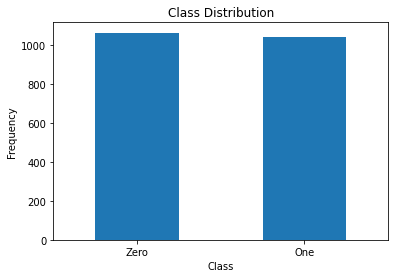

In [112]:
count_classes = pd.value_counts(y, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")

LABELS = ["Zero", "One"]

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [113]:
One = df[y==1]

Zero = df[y==0]

print(Zero.shape,One.shape)

(1041, 1025) (1063, 1025)


In [114]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X_res,y_res=sm.fit_resample(X,y)

In [115]:
print(X_res.shape)
print(y_res.shape)

(2126, 300)
(2126,)


In [116]:
#Split data into independent (X) and dependent(Y) columns

y = y_res
X = X_res

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [118]:
print(X_train.shape)
print(X_test.shape)

(1700, 300)
(426, 300)


In [119]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [120]:
X_train = X_train.reshape(1700, 300,1)
X_test = X_test.reshape(426, 300, 1)

In [121]:
epochs =30
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape = (300,1))) ##1st conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))  #2nd Conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.3))

model.add(Flatten())    #Flattening
model.add(Dense(64, activation='relu'))  ##fully connected layer
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))   #output layer

In [122]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, batch_size=32,validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
54/54 [==============================] - 2s 16ms/step - loss: 0.8134 - accuracy: 0.5847 - val_loss: 0.6719 - val_accuracy: 0.6033
Epoch 2/30
54/54 [==============================] - 1s 11ms/step - loss: 0.6730 - accuracy: 0.6541 - val_loss: 0.6671 - val_accuracy: 0.5822
Epoch 3/30
54/54 [==============================] - 1s 11ms/step - loss: 0.6362 - accuracy: 0.6829 - val_loss: 0.6506 - val_accuracy: 0.5962
Epoch 4/30
54/54 [==============================] - 1s 11ms/step - loss: 0.5554 - accuracy: 0.7147 - val_loss: 0.6343 - val_accuracy: 0.6221
Epoch 5/30
54/54 [==============================] - 1s 11ms/step - loss: 0.5384 - accuracy: 0.7235 - val_loss: 0.6214 - val_accuracy: 0.6432
Epoch 6/30
54/54 [==============================] - 1s 11ms/step - loss: 0.5052 - accuracy: 0.7476 - val_loss: 0.6109 - val_accuracy: 0.6526
Epoch 7/30
54/54 [==============================] - 1s 11ms/step - loss: 0.4733 - accuracy: 0.7771 - val_loss: 0.6032 - val_accuracy: 0.6808
Epoch 8/30
54

In [123]:
#y_pred = model.predict(X_train).ravel()
from sklearn.metrics import roc_curve
y_pred_cnn5 = model.predict(X_test).ravel()
fpr_5, tpr_5, thresholds = roc_curve(y_test, y_pred_cnn5)
from sklearn.metrics import auc
auc_score5 = auc(fpr_5, tpr_5)
auc_score5

0.7595458553791886

In [124]:
from sklearn.metrics import average_precision_score, precision_recall_curve
y_pred_cnn5 = model.predict(X_test).ravel()
precision_5, recall_5, thresholds = precision_recall_curve(y_test, y_pred_cnn5)
aupr_score5 = auc(recall_5, precision_5)
print(aupr_score5)

0.745852195064852


## 6. FastText+Word2vec

In [125]:
import pandas as pd
from pandas import read_excel
file_name = '/content/gdrive/MyDrive/word2vec+fasttext_allghor.csv'
# Glove3decimal.csv
# Gloveallghor.csv 
#df = pd.read_csv(file_name, index_col=0)
df = pd.read_csv(file_name)
print(df.head()) # print the first 5 rows

       tpc0      tpc1      tpc2      tpc3      tpc4      tpc5      tpc6  \
0 -0.037980 -0.022374 -0.000357 -0.052267 -0.080404 -0.026881  0.054797   
1 -0.046191 -0.036129 -0.002969 -0.074574 -0.081948 -0.029251  0.039459   
2 -0.039378 -0.029917 -0.002562 -0.051458 -0.080362 -0.040203  0.048534   
3 -0.037194 -0.028180  0.002139 -0.050322 -0.086340 -0.028409  0.051199   
4 -0.038799 -0.011877  0.008337 -0.024062 -0.086949 -0.031327  0.053610   

       tpc7      tpc8      tpc9  ...   PSSM504   PSSM505   PSSM506   PSSM507  \
0 -0.015409 -0.011325 -0.086878  ...  0.071249 -0.027845 -0.030502  0.009951   
1 -0.008533 -0.009899 -0.084967  ...  0.066538 -0.027696 -0.041256  0.003160   
2  0.002905 -0.015046 -0.078904  ...  0.069494 -0.021039 -0.040292  0.034493   
3 -0.011362 -0.014576 -0.086905  ...  0.073099 -0.031108 -0.030192  0.012665   
4 -0.003705 -0.022229 -0.075298  ...  0.064635 -0.022508 -0.039198  0.025195   

    PSSM508   PSSM509   PSSM510   PSSM511   Fast512  Target  
0  0.0

In [126]:
features = np.array(df.columns[:-1])
target = 'Target'

X = df[features]
y = df[target]

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=100)

In [128]:
def xgb_shap_values(X_train, y_train, X_test):

    model = XGBClassifier()
    model.fit(X_train, y_train)
    explainer = shap.TreeExplainer(model, X_train)
    shap_values_xgb = explainer.shap_values(X_test)
    # shap.summary_plot(shap_values_xgb, X_test)
    # shap.summary_plot(shap_values_xgb, X_test, plot_type ='bar')
    # shap.dependence_plot("Age", shap_values_xgb, X_test, interaction_index = 'rate Po2')
    shap_sum = np.abs(shap_values_xgb).mean(axis=0)
    importance_df = pd.DataFrame([features, shap_sum.tolist()]).T
    importance_df.columns = ['Column Name', 'Shap Importance']
    importance_df= importance_df.sort_values('Shap Importance', ascending = False)
    return importance_df

In [129]:
selected_df = xgb_shap_values(X_train, y_train,  X_test)

In [130]:
selected_df = selected_df[0:300]
selected_df

,Column Name,Shap Importance
829,PSSM317,0.124091
235,tpc235,0.084703
710,PSSM198,0.08255
597,PSSM85,0.07972
61,tpc61,0.073022
...,...,...
934,PSSM423,0.002755
388,tpc388,0.002714
895,PSSM383,0.002701
810,PSSM298,0.002692


In [131]:
cols = selected_df['Column Name']
cols

829    PSSM317
235     tpc235
710    PSSM198
597     PSSM85
61       tpc61
        ...   
934    PSSM423
388     tpc388
895    PSSM383
810    PSSM298
693    PSSM181
Name: Column Name, Length: 300, dtype: object

In [132]:
## converting df to numpy array/list
trainingdf = np.array(cols)
trainingdf

array(['PSSM317', 'tpc235', 'PSSM198', 'PSSM85', 'tpc61', 'PSSM160',
       'tpc53', 'tpc293', 'tpc203', 'PSSM45', 'PSSM36', 'PSSM475',
       'PSSM168', 'tpc181', 'PSSM122', 'PSSM180', 'tpc312', 'tpc389',
       'PSSM486', 'PSSM171', 'PSSM78', 'PSSM330', 'PSSM336', 'PSSM386',
       'tpc371', 'PSSM485', 'tpc479', 'PSSM275', 'PSSM297', 'PSSM87',
       'tpc455', 'PSSM492', 'PSSM495', 'tpc323', 'PSSM165', 'tpc419',
       'PSSM509', 'PSSM268', 'PSSM406', 'tpc427', 'tpc435', 'PSSM152',
       'tpc247', 'PSSM264', 'PSSM402', 'PSSM371', 'PSSM309', 'PSSM424',
       'PSSM156', 'PSSM335', 'tpc239', 'PSSM93', 'PSSM494', 'PSSM33',
       'PSSM254', 'tpc265', 'tpc240', 'tpc185', 'tpc241', 'tpc449',
       'PSSM18', 'PSSM465', 'tpc34', 'tpc484', 'PSSM142', 'tpc46',
       'PSSM137', 'tpc31', 'PSSM120', 'tpc79', 'tpc498', 'PSSM200',
       'PSSM115', 'PSSM500', 'PSSM321', 'PSSM117', 'tpc41', 'tpc337',
       'PSSM192', 'PSSM408', 'tpc87', 'tpc99', 'tpc494', 'PSSM363',
       'PSSM261', 'PSSM37', 

In [133]:
df1 = X[trainingdf]
df1

,PSSM317,tpc235,PSSM198,PSSM85,tpc61,PSSM160,tpc53,tpc293,tpc203,PSSM45,...,tpc496,PSSM319,tpc165,tpc55,PSSM384,PSSM423,tpc388,PSSM383,PSSM298,PSSM181
0,0.054743,0.010229,0.019254,0.035640,-0.076293,-0.006537,-0.014063,-0.042536,-0.019028,-0.007473,...,0.020814,-0.025304,0.018445,0.030939,0.112845,-0.060246,0.042437,-0.070173,-0.082324,-0.054883
1,0.065115,0.003465,0.025756,0.041059,-0.077782,-0.010033,-0.019568,-0.045497,-0.009494,-0.017922,...,0.022215,-0.025160,0.020701,0.028692,0.107158,-0.050187,0.039656,-0.080014,-0.081936,-0.048517
2,0.044884,0.016035,0.013189,0.043632,-0.078777,-0.005968,-0.013736,-0.041178,-0.018427,-0.038777,...,0.018036,0.000761,0.018865,0.030225,0.111016,-0.039826,0.044888,-0.091369,-0.067095,-0.038587
3,0.059886,0.011590,0.020902,0.038796,-0.073037,-0.009479,-0.014139,-0.042357,-0.021501,-0.007649,...,0.015546,-0.031406,0.018886,0.029474,0.106709,-0.048648,0.044442,-0.078895,-0.088016,-0.047608
4,0.062862,0.016680,0.014097,0.029319,-0.074774,-0.008625,-0.010863,-0.050443,-0.027026,-0.009316,...,0.019897,0.004023,0.024597,0.025873,0.104224,-0.058865,0.050007,-0.081242,-0.061752,-0.044856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,0.050557,0.011628,0.022901,0.035202,-0.074539,-0.008811,-0.016529,-0.041124,-0.016743,-0.018574,...,0.016665,-0.020277,0.020950,0.027696,0.111571,-0.049841,0.043506,-0.083626,-0.075576,-0.043647
2100,0.061508,0.008688,0.028656,0.040697,-0.075958,-0.009843,-0.016122,-0.043458,-0.010707,-0.018891,...,0.019871,-0.025143,0.025008,0.026779,0.107259,-0.045304,0.040045,-0.084233,-0.088357,-0.050155
2101,0.053880,0.007752,0.017598,0.040747,-0.077944,-0.015158,-0.018159,-0.044897,-0.011606,-0.018776,...,0.021581,-0.019164,0.021748,0.026681,0.111536,-0.052174,0.045008,-0.080288,-0.073974,-0.042780
2102,0.057374,0.011541,0.023072,0.043177,-0.074126,-0.003344,-0.019852,-0.043684,-0.019241,-0.017520,...,0.020397,-0.021593,0.019879,0.032453,0.116939,-0.041146,0.043391,-0.081471,-0.080109,-0.037987


In [134]:
X = df1
y = y

Text(0, 0.5, 'Frequency')

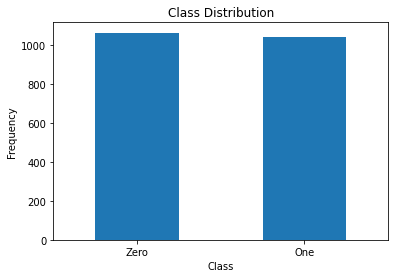

In [135]:
count_classes = pd.value_counts(y, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")

LABELS = ["Zero", "One"]

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [136]:
One = df[y==1]

Zero = df[y==0]

print(Zero.shape,One.shape)

(1041, 1025) (1063, 1025)


In [137]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X_res,y_res=sm.fit_resample(X,y)

In [138]:
print(X_res.shape)
print(y_res.shape)

(2126, 300)
(2126,)


In [139]:
#Split data into independent (X) and dependent(Y) columns

y = y_res
X = X_res

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 30)

In [149]:
print(X_train.shape)
print(X_test.shape)

(1700, 300)
(426, 300)


In [150]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [151]:
X_train = X_train.reshape(1700, 300,1)
X_test = X_test.reshape(426, 300, 1)

In [152]:
epochs =20
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape = (300,1))) ##1st conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))  #2nd Conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.3))

model.add(Flatten())    #Flattening
model.add(Dense(64, activation='relu'))  ##fully connected layer
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))   #output layer

In [153]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, batch_size=32,validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
54/54 [==============================] - 4s 26ms/step - loss: 0.8547 - accuracy: 0.5747 - val_loss: 0.6752 - val_accuracy: 0.6033
Epoch 2/20
54/54 [==============================] - 1s 16ms/step - loss: 0.6737 - accuracy: 0.6629 - val_loss: 0.6604 - val_accuracy: 0.6291
Epoch 3/20
54/54 [==============================] - 1s 14ms/step - loss: 0.5994 - accuracy: 0.6900 - val_loss: 0.6456 - val_accuracy: 0.6244
Epoch 4/20
54/54 [==============================] - 1s 16ms/step - loss: 0.5531 - accuracy: 0.7300 - val_loss: 0.6259 - val_accuracy: 0.6596
Epoch 5/20
54/54 [==============================] - 1s 16ms/step - loss: 0.5148 - accuracy: 0.7541 - val_loss: 0.6113 - val_accuracy: 0.6784
Epoch 6/20
54/54 [==============================] - 1s 12ms/step - loss: 0.5083 - accuracy: 0.7518 - val_loss: 0.6026 - val_accuracy: 0.6737
Epoch 7/20
54/54 [==============================] - 1s 11ms/step - loss: 0.4637 - accuracy: 0.7888 - val_loss: 0.6020 - val_accuracy: 0.6761
Epoch 8/20
54

In [154]:
#y_pred = model.predict(X_train).ravel()
from sklearn.metrics import roc_curve
y_pred_cnn6 = model.predict(X_test).ravel()
fpr_6, tpr_6, thresholds = roc_curve(y_test, y_pred_cnn6)
from sklearn.metrics import auc
auc_score6 = auc(fpr_6, tpr_6)
auc_score6

0.7642100617828773

In [155]:
from sklearn.metrics import average_precision_score, precision_recall_curve
y_pred_cnn6 = model.predict(X_test).ravel()
precision_6, recall_6, thresholds = precision_recall_curve(y_test, y_pred_cnn6)
aupr_score6 = auc(recall_6, precision_6)
print(aupr_score6)

0.7332556366841467


## 7. Glove + FastText +Word2vec

In [156]:
import pandas as pd
from pandas import read_excel
file_name = '/content/gdrive/MyDrive/word2vec+fasttext+glove_allghor.csv'
# Glove3decimal.csv
# Gloveallghor.csv 
#df = pd.read_csv(file_name, index_col=0)
df = pd.read_csv(file_name)
print(df.head()) # print the first 5 rows

       tpc0      tpc1      tpc2      tpc3      tpc4      tpc5      tpc6  \
0 -0.037980 -0.022374 -0.000357 -0.052267 -0.080404 -0.026881  0.054797   
1 -0.046191 -0.036129 -0.002969 -0.074574 -0.081948 -0.029251  0.039459   
2 -0.039378 -0.029917 -0.002562 -0.051458 -0.080362 -0.040203  0.048534   
3 -0.037194 -0.028180  0.002139 -0.050322 -0.086340 -0.028409  0.051199   
4 -0.038799 -0.011877  0.008337 -0.024062 -0.086949 -0.031327  0.053610   

       tpc7      tpc8      tpc9  ...   glov503   glov504   glov505   glov506  \
0 -0.015409 -0.011325 -0.086878  ...  0.034153 -0.028236  0.067696 -0.096331   
1 -0.008533 -0.009899 -0.084967  ...  0.035826 -0.019969  0.041198 -0.089281   
2  0.002905 -0.015046 -0.078904  ...  0.027479 -0.015310  0.053065 -0.039859   
3 -0.011362 -0.014576 -0.086905  ...  0.037971 -0.036039  0.087234 -0.085197   
4 -0.003705 -0.022229 -0.075298  ...  0.012862 -0.017681  0.083901 -0.106877   

    glov507   glov508   glov509   glov510   glov511  Target  
0  0.0

In [157]:
features = np.array(df.columns[:-1])
target = 'Target'

X = df[features]
y = df[target]

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=100)

In [159]:
def xgb_shap_values(X_train, y_train, X_test):

    model = XGBClassifier()
    model.fit(X_train, y_train)
    explainer = shap.TreeExplainer(model, X_train)
    shap_values_xgb = explainer.shap_values(X_test)
    # shap.summary_plot(shap_values_xgb, X_test)
    # shap.summary_plot(shap_values_xgb, X_test, plot_type ='bar')
    # shap.dependence_plot("Age", shap_values_xgb, X_test, interaction_index = 'rate Po2')
    shap_sum = np.abs(shap_values_xgb).mean(axis=0)
    importance_df = pd.DataFrame([features, shap_sum.tolist()]).T
    importance_df.columns = ['Column Name', 'Shap Importance']
    importance_df= importance_df.sort_values('Shap Importance', ascending = False)
    return importance_df

In [160]:
selected_df = xgb_shap_values(X_train, y_train,  X_test)

In [161]:
selected_df = selected_df[0:400]
selected_df

,Column Name,Shap Importance
829,PSSM317,0.126893
1439,glov415,0.113084
1076,glov52,0.10355
61,tpc61,0.089255
235,tpc235,0.086827
...,...,...
5,tpc5,0.000767
969,PSSM458,0.000764
953,PSSM442,0.000739
681,PSSM169,0.000698


In [162]:
cols = selected_df['Column Name']
cols

829     PSSM317
1439    glov415
1076     glov52
61        tpc61
235      tpc235
         ...   
5          tpc5
969     PSSM458
953     PSSM442
681     PSSM169
615     PSSM103
Name: Column Name, Length: 400, dtype: object

In [163]:
## converting df to numpy array/list
trainingdf = np.array(cols)
trainingdf

array(['PSSM317', 'glov415', 'glov52', 'tpc61', 'tpc235', 'PSSM85',
       'glov284', 'PSSM160', 'glov444', 'PSSM45', 'PSSM168', 'tpc389',
       'tpc293', 'glov206', 'PSSM275', 'PSSM198', 'PSSM171', 'tpc181',
       'PSSM485', 'tpc455', 'tpc427', 'PSSM297', 'glov309', 'PSSM117',
       'tpc479', 'PSSM475', 'PSSM336', 'tpc312', 'PSSM87', 'tpc239',
       'glov57', 'PSSM78', 'PSSM509', 'glov392', 'PSSM402', 'PSSM486',
       'tpc247', 'glov334', 'tpc419', 'PSSM115', 'tpc371', 'tpc264',
       'PSSM492', 'glov374', 'glov221', 'PSSM330', 'tpc345', 'PSSM122',
       'PSSM309', 'tpc203', 'glov168', 'glov48', 'glov366', 'PSSM108',
       'glov196', 'glov511', 'glov382', 'tpc425', 'glov242', 'tpc31',
       'tpc53', 'PSSM290', 'tpc157', 'PSSM2', 'PSSM18', 'PSSM348',
       'glov21', 'PSSM318', 'glov298', 'PSSM494', 'PSSM200', 'PSSM274',
       'tpc426', 'PSSM462', 'glov173', 'PSSM416', 'PSSM268', 'PSSM307',
       'glov364', 'tpc180', 'PSSM327', 'glov355', 'glov12', 'PSSM54',
       'PSSM286'

In [164]:
df1 = X[trainingdf]
df1

,PSSM317,glov415,glov52,tpc61,tpc235,PSSM85,glov284,PSSM160,glov444,PSSM45,...,glov288,tpc298,glov34,tpc256,glov305,tpc5,PSSM458,PSSM442,PSSM169,PSSM103
0,0.054743,0.074675,0.000303,-0.076293,0.010229,0.035640,0.022926,-0.006537,0.021856,-0.007473,...,-0.123889,0.036646,-0.034563,-0.001354,-0.003513,-0.026881,0.026909,0.075620,0.035480,-0.015384
1,0.065115,0.069659,-0.045227,-0.077782,0.003465,0.041059,-0.011425,-0.010033,0.040764,-0.017922,...,-0.070420,0.031402,-0.058434,-0.000203,-0.011295,-0.029251,0.017104,0.066409,0.041616,-0.033150
2,0.044884,0.045235,-0.060085,-0.078777,0.016035,0.043632,-0.073880,-0.005968,0.006527,-0.038777,...,-0.105466,0.030607,-0.053441,-0.010605,-0.011753,-0.040203,0.020127,0.086075,0.041327,-0.035592
3,0.059886,0.064951,-0.012383,-0.073037,0.011590,0.038796,-0.004089,-0.009479,0.042427,-0.007649,...,-0.138197,0.035178,-0.041372,0.002149,-0.016630,-0.028409,0.017413,0.068884,0.037511,-0.014311
4,0.062862,0.078552,-0.061718,-0.074774,0.016680,0.029319,-0.052266,-0.008625,-0.028659,-0.009316,...,-0.153823,0.033650,-0.032264,-0.006648,0.028629,-0.031327,0.036721,0.079445,0.033758,-0.023862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,0.050557,0.071531,-0.044671,-0.074539,0.011628,0.035202,-0.023707,-0.008811,0.021483,-0.018574,...,-0.110847,0.034477,-0.048595,-0.004958,0.005576,-0.032727,0.026583,0.080441,0.037830,-0.028194
2100,0.061508,0.067351,-0.045447,-0.075958,0.008688,0.040697,-0.015519,-0.009843,0.034303,-0.018891,...,-0.094719,0.032295,-0.044998,-0.000131,-0.019819,-0.030396,0.025655,0.074904,0.040681,-0.023593
2101,0.053880,0.065811,-0.052384,-0.077944,0.007752,0.040747,-0.028533,-0.015158,0.020095,-0.018776,...,-0.090378,0.034541,-0.060065,-0.003240,0.005724,-0.033411,0.022363,0.068242,0.037914,-0.032532
2102,0.057374,0.080016,-0.035019,-0.074126,0.011541,0.043177,-0.017203,-0.003344,0.026447,-0.017520,...,-0.118637,0.033665,-0.039509,-0.000768,0.001716,-0.035552,0.020420,0.070560,0.037638,-0.018680


In [165]:
X = df1
y = y

Text(0, 0.5, 'Frequency')

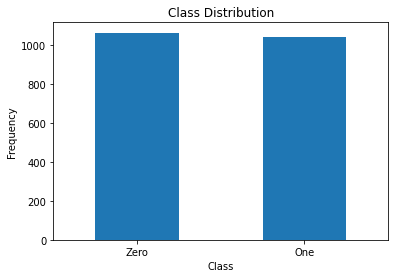

In [166]:
count_classes = pd.value_counts(y, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")

LABELS = ["Zero", "One"]

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [167]:
One = df[y==1]

Zero = df[y==0]

print(Zero.shape,One.shape)

(1041, 1537) (1063, 1537)


In [168]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X_res,y_res=sm.fit_resample(X,y)

In [169]:
print(X_res.shape)
print(y_res.shape)

(2126, 400)
(2126,)


In [170]:
#Split data into independent (X) and dependent(Y) columns

y = y_res
X = X_res

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

In [180]:
print(X_train.shape)
print(X_test.shape)

(1700, 400)
(426, 400)


In [181]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [182]:
X_train = X_train.reshape(1700, 400,1)
X_test = X_test.reshape(426, 400, 1)

In [183]:
epochs =20
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape = (400,1))) ##1st conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))  #2nd Conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.3))

model.add(Flatten())    #Flattening
model.add(Dense(64, activation='relu'))  ##fully connected layer
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))   #output layer

In [184]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, batch_size=32,validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
54/54 [==============================] - 3s 24ms/step - loss: 0.7490 - accuracy: 0.5988 - val_loss: 0.6693 - val_accuracy: 0.6221
Epoch 2/20
54/54 [==============================] - 1s 16ms/step - loss: 0.6135 - accuracy: 0.6847 - val_loss: 0.6533 - val_accuracy: 0.6103
Epoch 3/20
54/54 [==============================] - 1s 16ms/step - loss: 0.5636 - accuracy: 0.7094 - val_loss: 0.6390 - val_accuracy: 0.6362
Epoch 4/20
54/54 [==============================] - 1s 20ms/step - loss: 0.5076 - accuracy: 0.7600 - val_loss: 0.6214 - val_accuracy: 0.6197
Epoch 5/20
54/54 [==============================] - 1s 17ms/step - loss: 0.4903 - accuracy: 0.7600 - val_loss: 0.6086 - val_accuracy: 0.6268
Epoch 6/20
54/54 [==============================] - 1s 12ms/step - loss: 0.4556 - accuracy: 0.7912 - val_loss: 0.6046 - val_accuracy: 0.6573
Epoch 7/20
54/54 [==============================] - 1s 12ms/step - loss: 0.4296 - accuracy: 0.8106 - val_loss: 0.6015 - val_accuracy: 0.6455
Epoch 8/20
54

In [185]:
#y_pred = model.predict(X_train).ravel()
from sklearn.metrics import roc_curve
y_pred_cnn7 = model.predict(X_test).ravel()
fpr_7, tpr_7, thresholds = roc_curve(y_test, y_pred_cnn7)
from sklearn.metrics import auc
auc_score7 = auc(fpr_7, tpr_7)
auc_score7

0.7378117475535134

In [186]:
from sklearn.metrics import average_precision_score, precision_recall_curve
y_pred_cnn7 = model.predict(X_test).ravel()
precision_7, recall_7, thresholds = precision_recall_curve(y_test, y_pred_cnn7)
aupr_score7 = auc(recall_7, precision_7)
print(aupr_score7)

0.7115855553308698


In [188]:
#auc_score1 = 0.8832
#auc_score2 = 0.8489
#auc_score3 = 0.8263
#auc_score4 = 0.8559
#auc_score5 = 0.8567
#auc_score6 = 0.8519
#auc_score7 = 0.8061

aupr_score1 = 0.78699
aupr_score2 = 0.798456
aupr_score3 = 0.7748
aupr_score4 = 0.7612
aupr_score5 = 0.74485
aupr_score6 = 0.7332
aupr_score7 = 0.71158

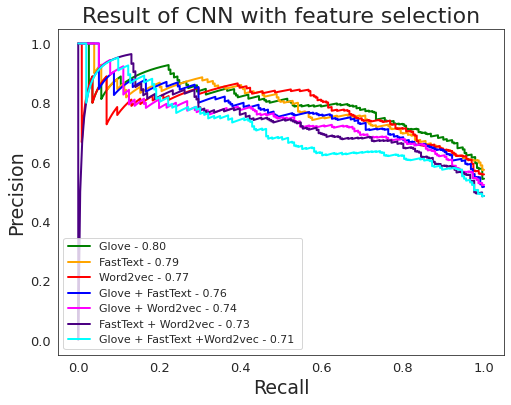

In [191]:
sns.set_style("white")
plt.figure(figsize=(8,6))

plt.plot(recall_2,precision_2, color = "green", label = "Glove - %0.2f " %aupr_score2, lw = 2)
plt.plot(recall_1,precision_1, color = "orange", label = "FastText - %0.2f " %aupr_score1, lw = 2)
plt.plot(recall_3,precision_3, color = "red", label = "Word2vec - %0.2f " %aupr_score3, lw = 2)
plt.plot(recall_4,precision_4, color = "blue", label = "Glove + FastText - %0.2f " %aupr_score4, lw = 2)

plt.plot(recall_5,precision_5, color = "magenta", label = "Glove + Word2vec - %0.2f " %aupr_score5, lw = 2)
plt.plot(recall_6,precision_6, color = "indigo", label = "FastText + Word2vec - %0.2f " %aupr_score6, lw = 2)
plt.plot(recall_7,precision_7, color = "cyan", label = "Glove + FastText +Word2vec - %0.2f " %aupr_score7, lw = 2)

#plt.plot([0,1], [0,1], color = 'purple', lw=2, linestyle='--')
plt.xlabel('Recall', fontsize = 19)
plt.ylabel('Precision', fontsize=19)
plt.title('Result of CNN with feature selection', fontsize=22)
plt.legend(loc = "lower left", fontsize=11)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('AUPR_all',dpi=300)
plt.show()

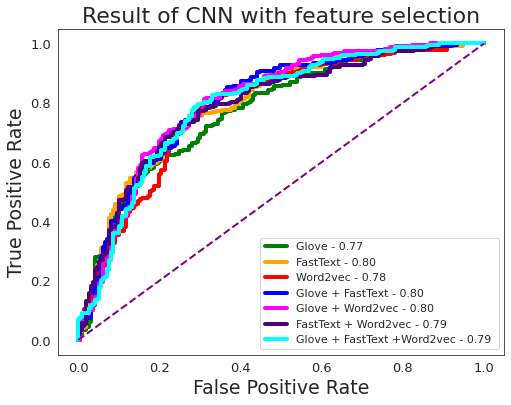

In [ ]:
sns.set_style("white")
plt.figure(figsize=(8,6))

plt.plot(fpr_1,tpr_1, color = "green", label = "Glove - %0.2f " %auc_score1, lw = 4)
plt.plot(fpr_2,tpr_2, color = "orange", label = "FastText - %0.2f " %auc_score2, lw = 4)
plt.plot(fpr_3,tpr_3, color = "red", label = "Word2vec - %0.2f " %auc_score3, lw = 4)
plt.plot(fpr_4,tpr_4, color = "blue", label = "Glove + FastText - %0.2f " %auc_score4, lw = 4)

plt.plot(fpr_5,tpr_5, color = "magenta", label = "Glove + Word2vec - %0.2f " %auc_score5, lw = 4)
plt.plot(fpr_6,tpr_6, color = "indigo", label = "FastText + Word2vec - %0.2f " %auc_score6, lw = 4)
plt.plot(fpr_7,tpr_7, color = "cyan", label = "Glove + FastText +Word2vec - %0.2f " %auc_score7, lw = 4)

plt.plot([0,1], [0,1], color = 'purple', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize = 19)
plt.ylabel('True Positive Rate', fontsize=19)
plt.title('Result of CNN with feature selection', fontsize=22)
plt.legend(loc = "lower right", fontsize=11)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('ROC_all',dpi=300)
plt.show()